# Tarea 2 - Machine Learning
---

## Claudia Hazard 201404523-9
## Matías Araya 201173082-8

---

## 1. Tipos de fronteras en Clasificación
---

# a)
---

Se comienza creando dataset con 2 dimensiones, conformado por dos conjuntos de datos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n_samples=500
mean = (0,-4)
C = np.array([[0.3, 0.1], [0.1, 1.5]])
datos1 = np.random.multivariate_normal(mean, C, n_samples)
outer_circ_x = np.cos(np.linspace(0, np.pi, n_samples))*3
outer_circ_y = np.sin(np.linspace(0, np.pi, n_samples))*3
datos2 = np.vstack((outer_circ_x,outer_circ_y)).T
from sklearn.utils import check_random_state
generator = check_random_state(10)
datos2 += generator.normal(scale=0.3, size=datos2.shape)

Se agrega ruido al conjunto de datos para así realizar un estudio mas realista.

In [ ]:
X = np.concatenate((datos1, datos2), axis=0)
print len(X)
n = 20 #ruido/noise
y1 = np.zeros(datos1.shape[0]+n)
y2 = np.ones(datos2.shape[0]-n)
y = np.concatenate((y1,y2),axis=0)

Con la configuración de el código anterior existen $1000$ datos en total, los cuales $520$ corresponden a un grupo (puntos azules) y $480$ a otro (puntos verdes). Se nota como el ruido de de $20$ correspondientes realmente al grupo azul, se asemejan más a la figura del grupo verde por lo que genera ruido a la muestra.

La función `visualize_border` es de utilidad para visualizar el conjunto de datos con su respectivo clasificador, el que se utilizará en preguntas posteriores.

In [ ]:
def visualize_border(model,x,y,title=""):
    fig = plt.figure(figsize=(12,6))

    plt.scatter(x[:,0], x[:,1], s=50, c=y, cmap=plt.cm.winter)
    h = .02 # step size in the mesh
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()

# b) LDA
---

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_lda = LDA()
model_lda.fit(X,y)
visualize_border(model_lda,X,y,"LDA")

Con Linear Discriminant Analysis (LDA), como se ve en la figura mostrada, traza una linea clara que logra separar la clasificación de ambos grupos, quedando así la mayoría de los puntos azules por un lado y la totalidad de los verdes en el otro.

# c) QDA
--- 

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
model_qda = QDA()
model_qda.fit(X,y)
visualize_border(model_qda,X,y,"QDA")

En este caso con Quadratic Discriminant Analysis (QDA), como lo dice su nombre al ser de tipo cuadrático, logra crear una curva asemejandose de mejor manera a la figura y cualitativamente se podría decir que clasifica mejor que LDA. Esto sin embargo conlleva un mayor costo de computación además de mayor posibilidad de overfitting, con lo que se analiza en próxima sección si vale la pena.

Que los datos se encuentren distribuidos de forma normal es fundamental para el clasificador LDA.

In [ ]:
plt.hist(datos1, bins='auto')
plt.title("Histograma datos 1")
plt.show()

In [ ]:
plt.hist(datos2, bins='auto')
plt.title("Histograma datos 2")
plt.show()

# d)
---

In [ ]:
from sklearn.metrics import accuracy_score

y_pred_lda = model_lda.predict(X)
y_pred_qda = model_qda.predict(X)

y_true = y

print("Miss Classification Loss LDA: %f"%(1-accuracy_score(y_true, y_pred_lda)))
print("Miss Classification Loss QDA: %f"%(1-accuracy_score(y_true, y_pred_qda)))

Con esto se puede ver que la diferencia entre los errores es muy pequña, donde LDA tiene un error de clasificación de $0.021$ y QDA es levemente menor con $0.020$. Con esto se puede comprobar, para este pequeño caso, que no es necesario utilizar QDA ya que genera un gasto extra además de generar un mayor overfitting y no se obtiene una mejor calidad en la predicción.

# e)
---

In [ ]:
from ipywidgets import interactive

def visualize_border_interactive(param):
    model = train_model(param)
    visualize_border(model,X,y)

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
def train_model(param):
    model=LR() #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X,y)
    return model

p_min = 0.01
p_max = 2
interactive(visualize_border_interactive, param=(p_min, p_max))

Como se puede apreciar en el gráfico interactivo, cambiando el paramétro se mueve ligeramente la línea divisiora de la regresión que separa ambas clases. Esto se puede asemejar a lo que hace Ridge o Lasso, donde se penalizan los coeficientes restando importancia a los que influyen de menor manera en el modelo. Así, si el parámetro es bajo, cercano a cero, tiene menos aceptación a que haya puntos mal clasificados. Con el parámetro en $0.1$ ni un punto verde queda completamente en el grupo azul. Mientras que, con un parámetro más alto, por ejemplo $10$ se nota como cambia donde la pendiente de la recta se hace más pronunciada, aceptando así algunos puntos verdes en el grupo azul. En resumen, el parámetro $C$ corresponde a una medida de regularización. Entre más bajo sea, más fuerte es.

## f)
---

Support Vector Machine (SVM), a diferencia de la otras técnicas que se han visto, crea un hiperplano separando las 2 clases lo mas ampliamente posible. No como el resto de los métodos que minimiza los errores.

In [ ]:
from sklearn.svm import SVC as SVM #SVC is for classification

def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X,y)
    return model

p_min = 0.1
p_max = 1
interactive(visualize_border_interactive, param=(p_min, p_max))

El efecto es casi el mismo que la Regresión Logística, donde con una valor alto de el parámetro $C$ la línea divisora queda con una mayor pendiente, aceptando así los valores azules correspondientes al ruido pero incluyendo también unos pocos del conjunto verde. Mientras que con un $C$ cercano a cero permite menos puntos azules de los correspondientes al ruido pero no acepta ni un verde en el conjunto azul.

En general, el valor $C$ dice cuanto se quiere evitar de missclasification en cada conjunto de entrenamiento. Para valores grandes de $C$, la optimización eligirá un margen menor para el hiperplano. Por otro lado un valor bajo de $C$ el optimizador causará un margen mayor separando el hiperplano, a pesar de que genere un mayor missclasification.

## g)
---

Una solución simplificada para SVM no Lineal puede ser escrita como:

$$\hat{f(x)} = \displaystyle\sum_{i=1}^{n} \hat{\alpha_i}y_i K(x,x_i) + \hat{\beta_0}$$

Donde $K(x, x_i)$ es la función Kernel y se cumple que para todo $x_i$, $0 < \alpha_i < C$.

In [ ]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='rbf')
    model.fit(X,y)
    return model

p_min = 0.01
p_max = 1
interactive(visualize_border_interactive, param=(p_min, p_max))

In [ ]:
def train_model(param):
    model= SVM()
    model.set_params(C=param,kernel='poly')
    model.fit(X,y)
    return model

p_min = 0.1
p_max = 1
interactive(visualize_border_interactive, param=(p_min, p_max))

El rol del parámetro $C$ es claro en un espacio con más atributos, esto dado que una separación perfecta es usualmente conseguible. Un valor grande de $C$ hará que sea más ondulado, mientras que uno más pequeño reflejará curvas más suaves.

El efecto anterior explicado se puede ver de buena manera con el Kernel rbf, donde cambiando el parámetro con un valor de $1$ quedan las líneas más onduladas encerrando al conjunto verde. Mientras cuando se asigna un valor cercano a cero, $0.1$, se ve reflejado que las línas encierran al grupo azul siendo más suave las curvas.

## h)
---

In [ ]:
from sklearn.tree import DecisionTreeClassifier as Tree
def train_model(param):
    model= Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='gini',splitter='best')
    model.fit(X,y)
    return model

p_min = 1
p_max = 4
interactive(visualize_border_interactive, param=(p_min, p_max))

El parámetro que se varía es el de maxima profundidad del árbol. Primero se realiza el ánalisis con el criterio Gini, el cual es la suma de las varianzas de cada distribución. Con el parámetro igual a $1$, solo se tendrá un árbol de profundidad 1, por lo que, como se ve en la imagen, separa el conjunto de datos en $2$. Separando claramente ambos conjuntos de datos (azules y verdes).

Si esta parámetro aumenta, se agrega un nivel de decisión y de profundidad, por lo que se vuelve más preciso el árbol. Como se puede ver en el código anterior, con 3 niveles es capaz de capturar gran parte del ruido en el conjunto verde a su correspondiente conjunto.

La gran ventaja de este método es su simpleza para ser interpretado, pero sufre de un gran overfitting comparado con los otros métodos anteriormente vistos. Esto se puede comprobar que si el parámetro es $4$, se agrega una tercera clase inexistente con puntos azules y verdes.

In [ ]:
from sklearn.tree import DecisionTreeClassifier as Tree
def train_model(param):
    model= Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='entropy',splitter='best')
    model.fit(X,y)
    return model

p_min = 2
p_max = 8
interactive(visualize_border_interactive, param=(p_min, p_max))

Se cambia el criterio a information gain, este intenta minimizar la suma pesada de las entropías resultantes. Este es equivalente a maximizar la ganancia de información al dividir el nodo. En otras palabras se debe buscar una medida de la pureza de cada nodo resultante.

Con poca entropía es claro saber a que clase corresponde, si es muy entrópica no se tiene esa claridad.

Con este criterio es notorio que se obtienen mejores resultado cuando el parámetro es alto en comparación a Gini, donde por ejemplo con $8$ logra diferenciar los puntos azules del ruido sin agregar puntos verdes.

## i)
---

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

def train_model(param):
    model = KNeighborsClassifier()
    model.set_params(n_neighbors=param)
    model.fit(X,y)
    return model

p_min = 1
p_max = 10
interactive(visualize_border_interactive, param=(p_min, p_max))

El algoritmo kNN se refiere a k Nearest Neighbors, por lo que el parámetro $k$ es para ver los vecinos más cercanos. Si se elige por ejemplo $k=2$, un punto quedará en el conjunto donde sus dos vecinos más cercanos estén. Esto se puede ver cualitativamente en el gráfico, donde con un $k$ bajo en la sección donde está el ruido las líneas se dispersan de manera que encierran de a uno los puntos. Mientras que con un $k$ mayor la línea se hace más continua.

## 2. Análisis de audios como datos brutos
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name

SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b

## a)
Se crea el dataset a partir de  set_a.csv.

In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv('./latidos/set_a.csv')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 4 columns):
dataset     176 non-null object
fname       176 non-null object
label       124 non-null object
sublabel    0 non-null float64
dtypes: float64(1), object(3)
memory usage: 5.6+ KB


,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN
5,a,set_a/artifact__201105061143.wav,artifact,NaN
6,a,set_a/artifact__201105190800.wav,artifact,NaN
7,a,set_a/artifact__201105280851.wav,artifact,NaN
8,a,set_a/artifact__201106010559.wav,artifact,NaN
9,a,set_a/artifact__201106010602.wav,artifact,NaN


Se calculan la cantidad de registros por clase.

In [4]:
art=0
mur=0
extra=0
norm=0
nulo=0
for i in df["label"]:
    if i=="artifact":
        art+=1
    elif i=="murmur":
        mur+=1
    elif i=="extrahls":
        extra+=1
    elif i=="normal":
        norm+=1
    else:
        nulo+=1
print ("Tipo artifact:"+str(art))
print ("Tipo extrahls:"+str(extra))
print ("Tipo murmur:"+str(mur))
print ("Tipo normal:"+str(norm))
print ("Tipo no determinado:"+str(nulo))

Tipo artifact:40
Tipo extrahls:19
Tipo murmur:34
Tipo normal:31
Tipo no determinado:52


El dataset esta compuesto por 4 columnas de las cuales dataset y sublabel no aportan mucho pues dataset siempre toma el valor de a y sublabel no tiene ningun dato. En cuanto a las columnas fname y label, fname corresponde a el nombre del archivo que contiene la data, el tipo de sonido y luego el nombre del archivo wav, mientras que label corresponde al tipo de sonido nuevamente.

Ademas hay 40 registros del tipo artifact, 19 del tipo extrahls, 34 murmur, 31 normal y 52 sin tipo especifico.

## b)

Se leen los archivos .wav y se transforman en secuencias de tiempo, es decir, la amplitud del audio espaciadas de manera uniforme en el tiempo. Luego se realiza un padding de ceros al final de cada secuencia para que todas las secuencias de tiempo queden con el mismo largo o misma cantidad de mediciones. Es importante realizar esto pues para realizar el aprendizaje de maquina mas adelante se realizará una transformada de fourier pasando las amplitudes a frecuencias, al realizar el zero padding todos los registros estarán en el mismo espectro de frecuencias.

In [5]:
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux
new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelledtest')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='./latidos/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))
new_df

,file_name,time_series,len_series
0,artifact__201012172012.wav,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900
1,artifact__201105040918.wav,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900
2,artifact__201105041959.wav,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900
3,artifact__201105051017.wav,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900
4,artifact__201105060108.wav,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900
5,artifact__201105061143.wav,"[-2.0, 2.0, -2.0, 2.0, -2.0, 1.0, 1.0, -3.0, 3...",396900
6,artifact__201105190800.wav,"[47.0, 70.0, 47.0, 58.0, 53.0, 45.0, 13.0, 21....",396900
7,artifact__201105280851.wav,"[605.0, 648.0, 473.0, 171.0, -203.0, -512.0, -...",396900
8,artifact__201106010559.wav,"[-49.0, 0.0, 17.0, -43.0, 30.0, 9.0, -29.0, 50...",396900
9,artifact__201106010602.wav,"[52.0, -1291.0, -1116.0, 101.0, 2429.0, 3776.0...",396900


Es necesario realizar un padding para tener la misma cantidad de elementos.

## c)
Se cambian las etiquetas de los audios por otras asignadas por un doctor experto.

In [6]:
new_labels =[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2,
2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1,
1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 0,
2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0,
0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]
new_df

,file_name,time_series,len_series,target
0,artifact__201012172012.wav,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900,artifact
1,artifact__201105040918.wav,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900,artifact
2,artifact__201105041959.wav,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900,artifact
3,artifact__201105051017.wav,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900,artifact
4,artifact__201105060108.wav,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900,artifact
5,artifact__201105061143.wav,"[-2.0, 2.0, -2.0, 2.0, -2.0, 1.0, 1.0, -3.0, 3...",396900,artifact
6,artifact__201105190800.wav,"[47.0, 70.0, 47.0, 58.0, 53.0, 45.0, 13.0, 21....",396900,artifact
7,artifact__201105280851.wav,"[605.0, 648.0, 473.0, 171.0, -203.0, -512.0, -...",396900,artifact
8,artifact__201106010559.wav,"[-49.0, 0.0, 17.0, -43.0, 30.0, 9.0, -29.0, 50...",396900,artifact
9,artifact__201106010602.wav,"[52.0, -1291.0, -1116.0, 101.0, 2429.0, 3776.0...",396900,artifact


In [7]:
art=0
mur=0
norm=0

for i in new_df["target"]:
    if i=="artifact":
        art+=1
    elif i=="murmur":
        mur+=1
        extra+=1
    elif i=="normal/extrahls":
        norm+=1

print ("Tipo artifact:"+str(art))
print ("Tipo murmur:"+str(mur))
print ("Tipo normal/extrahls:"+str(norm))


Tipo artifact:58
Tipo murmur:53
Tipo normal/extrahls:65


Al realizar los cambios existen solo 3 clases. Artifact con 58 registros, murmur con 53 y normal/extrahls con 65. Al tener etiquetas mal asignadas con los datos se entrenará a la maquina erroneamente, es decir, la función creada por la maquina predecirá con muchos mas fallos la asignación para un dato de entrada.
Si se cambiara un solo dato esta problematica dependerá de la forma en que se esté entrenando la maquina pues hay técnicas que son más y otras menos sensibles a outliers.
Para la utilización de una regresión logística dependerá de la cantidad de datos pues si se tienen pocos datos y uno se cambia este influirá fuertemente en la estimación de los parametros, mientras que al ser un dataset muy grande y solo un 
outlier no influirá significativamente. En cambio al utilizar regresión lineal cualquier valor mal ingresado podría generar un gran corrimiento de la pendiente.


## d)
Se codifican las clases con valores numericos, el valor 0 corresponde a artifact, 1 a murmur y 2 a normal/extrahls.

In [8]:
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)
new_df

,file_name,time_series,len_series,target
0,artifact__201012172012.wav,"[1.0, -3.0, -1.0, -7.0, -9.0, -2.0, -6.0, -5.0...",396900,0
1,artifact__201105040918.wav,"[-2.0, 3.0, -4.0, 4.0, -3.0, 2.0, -1.0, 0.0, 0...",396900,0
2,artifact__201105041959.wav,"[6.0, -4.0, -9.0, -1.0, -4.0, 1.0, -5.0, 2.0, ...",396900,0
3,artifact__201105051017.wav,"[-85.0, -198.0, -214.0, -173.0, -177.0, -206.0...",396900,0
4,artifact__201105060108.wav,"[53.0, -35.0, 47.0, 170.0, 340.0, 436.0, 535.0...",396900,0
5,artifact__201105061143.wav,"[-2.0, 2.0, -2.0, 2.0, -2.0, 1.0, 1.0, -3.0, 3...",396900,0
6,artifact__201105190800.wav,"[47.0, 70.0, 47.0, 58.0, 53.0, 45.0, 13.0, 21....",396900,0
7,artifact__201105280851.wav,"[605.0, 648.0, 473.0, 171.0, -203.0, -512.0, -...",396900,0
8,artifact__201106010559.wav,"[-49.0, 0.0, 17.0, -43.0, 30.0, 9.0, -29.0, 50...",396900,0
9,artifact__201106010602.wav,"[52.0, -1291.0, -1116.0, 101.0, 2429.0, 3776.0...",396900,0


## e)
Se desordenan los datos para que no se encuentren ordenados por las etiquetas y se crea una matriz de amplitudes en el tiempo.

In [9]:
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape

(176, 396900)

Se observa que las dimensiones de la matriz son 176x396900 estas podrían generar problemas.El primer problema es que al tener tantos dimensiones costará mas la visualización de los datos para realizar un entendimiento de ellos, el segundo es el tiempo que se demorará una maquina en procesar todos los datos.

## f)
Se realiza la transformada de fourier discreta para pasar los datos desde el dominio de tiempos al dominio de frecuencias en la señal de sonido.

In [10]:
X_fourier = np.abs(np.fft.fft(X))

## g)
Se realiza un muetreo a través de una técnica de muestreo especializada en secuencias.

In [11]:
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
    sequence = X_fourier[i,:].copy()
    resampled_sequence = signal.resample(sequence, 100000)
    X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape

(176, 100000)

En este paso se realiza un beneficio pues se disminuye la dimensionalidad de esta forma el aprendizaje de la maquina se demorará menos ademas de que se mantendrá la información mas relevante.

Se puede demostrar que el muestreo es representativo a continuación:

In [ ]:
plt.scatter(range(0,100000),X_resampled[0], c="y", alpha=0.7)
plt.show()

In [ ]:
plt.scatter(range(0,396900),X_fourier[0], c="y", alpha=0.7)
plt.show()

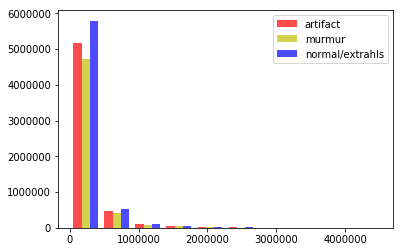

In [12]:
d1=[]
d2=[]
d3=[]
c=0
for i in y:
    if i==0:
        d1.extend(X_resampled[c])
    if i==1:
        d2.extend(X_resampled[c])
    if i==2:
        d3.extend(X_resampled[c])
plt.hist([d1, d2, d3],color=["r","y","b"],label=["artifact","murmur","normal/extrahls"],alpha=0.7)
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = (18,8)
plt.show()

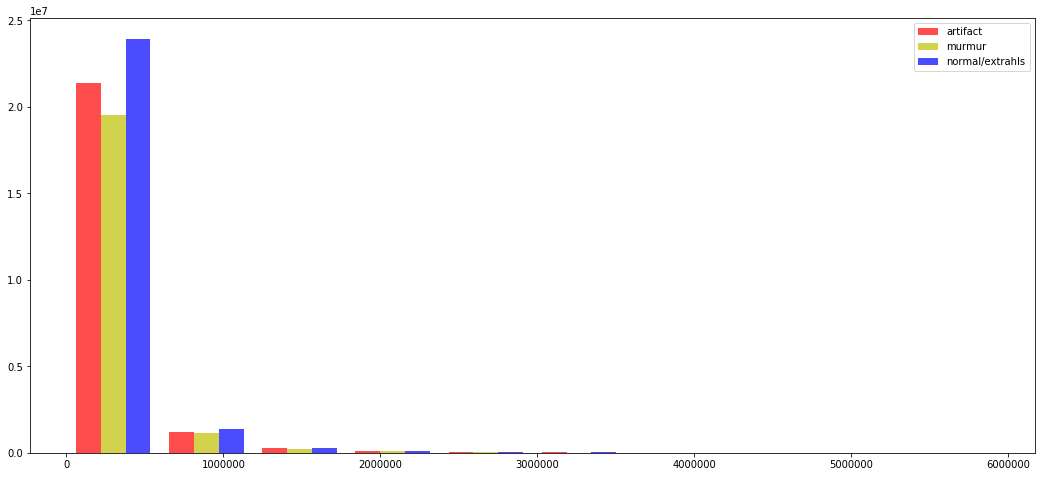

In [14]:
d1=[]
d2=[]
d3=[]
c=0
for i in y:
    if i==0:
        d1.extend(X_fourier[c])
    if i==1:
        d2.extend(X_fourier[c])
    if i==2:
        d3.extend(X_fourier[c])
plt.hist([d1, d2, d3],color=["r","y","b"],label=["artifact","murmur","normal/extrahls"],alpha=0.7)
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = (18,8)
plt.show()

## h)
Se genera un conjunto de pruebas mediante hold-out validation.

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, random_state=42)

## i)
Se estandarizan los datos para ser trabajados.

In [16]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

## j)
Se realiza una reducción de dimensionalidad utilizando PCA, representando los datos en 2 dimensiones.

In [17]:
from sklearn.decomposition import PCA
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)

Se visualizan en 2 dimensiones.

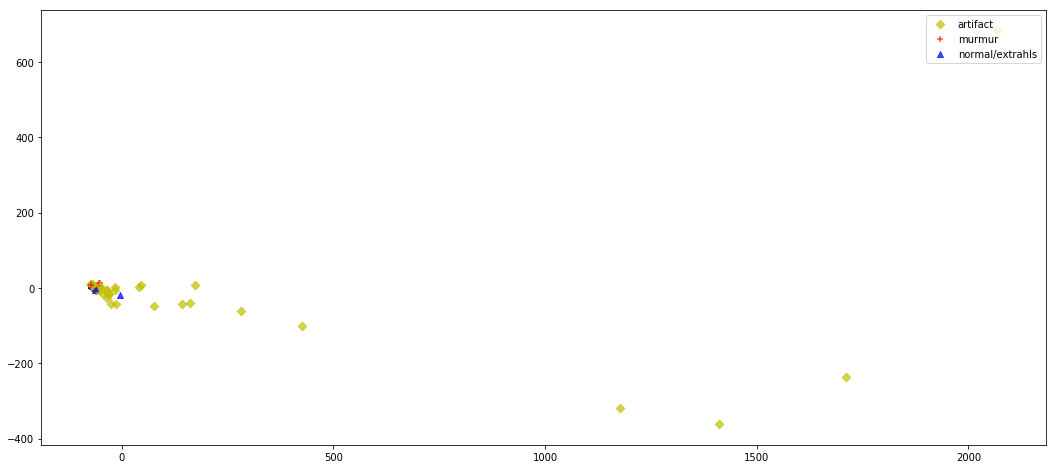

In [18]:
c=0
h1=0
h2=0
h3=0
for i in X_pca_train:
    if y_train[c]==0:
        if h1==0:
            plt.scatter(i[0],i[1],marker="D", c="y", alpha=0.7,label="artifact")
            h1=1
        else:
            plt.scatter(i[0],i[1],marker="D", c="y", alpha=0.7)
    if y_train[c]==1:
        if h2==0:
            plt.scatter(i[0],i[1],marker="^", c="b", alpha=0.7,label="normal/extrahls")
            h2=1
        else:
            plt.scatter(i[0],i[1],marker="^", c="b", alpha=0.7)
    if y_train[c]==2:
        if h3==0:
            plt.scatter(i[0],i[1],marker="+", c="r",alpha=0.7,label="murmur")
            h3=1
        else:
            plt.scatter(i[0],i[1],marker="+", c="r",alpha=0.7)
    c+=1
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = (18,8)
plt.show()

## k)
Se entrena un modelo de regresión logistica variando el parametro C como 0.0001,0.01,0.1,1,10,100 y 1000. Mostrando un gráfico resumen del error en función del hiper-parámetro.

In [ ]:
Cs = [0.0001,0.01,0.1,1,10,100,1000]
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression as LR
def train_model1(param):
    model=LR() #define your model
    model.set_params(C=param,penalty='l2')
    model.fit(X_pca_train,y_train)
    return model
def grafica1():
    e=[]
    for n in Cs:
        model=train_model1(n)
        y_pred = model.predict(X_pca_test)
        error = 1-accuracy_score(y_test,y_pred)
        e.append(error)
    plt.plot(Cs,e, 'r', zorder=1, lw=2)
    plt.scatter(Cs,e,marker="D", c="g", alpha=0.7,label="Regresion logistica")
    plt.legend(loc='upper right')
print (grafica1())

Se entrena una máquina de soporte vectorial(SVM) con kernel lineal variando el hiper-parámetro C al igual que en la parte anterior y construyendo un gráfico resumen del error.

In [ ]:
from sklearn.svm import SVC as SVM #SVC is for classification

def train_model2(param):
    model= SVM()
    model.set_params(C=param,kernel='linear')
    model.fit(X_pca_train,y_train)
    return model
def grafica2():
    e=[]
    for n in Cs:
        model=train_model2(n)
        y_pred = model.predict(X_pca_test)
        error = 1-accuracy_score(y_test,y_pred)
        e.append(error)
    plt.plot(Cs,e, 'y', zorder=1, lw=2)
    plt.scatter(Cs,e,marker="D", c="b", alpha=0.7,label="SVM")
    plt.legend(loc='upper right')
    return e
print (grafica2())
plt.show()

Se observa que SVM tiene un error miss clasification mucho menor para el parametro regularizador C=1000. Mientras que el menor error para la regresión logística se obtiene en 1.

## l)

Gini se basa en las varianzas de cada distribución
mientras que en entropia cada hoja maneja la distribución de probabilidad. 

Se entrena un árbol de decisión con la el criterio de entropia y se construye un gráfico.


In [ ]:
Depths = range(1,30)

from sklearn.tree import DecisionTreeClassifier as Tree
def train_model3(param):
    model= Tree() #edit the train_model function
    model.set_params(max_depth=param,criterion='entropy',splitter='best')
    model.fit(X_pca_train,y_train)
    return model
def grafica3():
    e=[]
    for n in Depths:
        model=train_model3(n)
        y_pred = model.predict(X_pca_test)
        error = 1-accuracy_score(y_test,y_pred)
        e.append(error)
    plt.plot(Depths,e, 'r', zorder=1, lw=2)
    plt.scatter(Depths,e,marker="D", c="g", alpha=0.7,label="Árbol de decisión")
    plt.legend(loc='upper right')
    plt.show()
print (grafica3())

## m)
Experimente con diferentes dimensiones d para la proyecci´on de PCA con el prop´osito de obtener un
modelo con menor error. Construya una tabla o gr´afico resumen.

In [ ]:
from sklearn.decomposition import PCA
a=range(1,10)
plt.rcParams["figure.figsize"] = (8,6)
for d in a:
    model = PCA(n_components=d)
    pca_model.fit(X_train)
    X_pca_train = pca_model.transform(X_train)
    X_pca_test = pca_model.transform(X_test)
    grafica1()
    plt.show()

In [ ]:

for d in a:
    model = PCA(n_components=d)
    pca_model.fit(X_train)
    X_pca_train = pca_model.transform(X_train)
    X_pca_test = pca_model.transform(X_test)
    grafica2()
    plt.show()

In [ ]:

for d in a:
    model = PCA(n_components=d)
    pca_model.fit(X_train)
    X_pca_train = pca_model.transform(X_train)
    X_pca_test = pca_model.transform(X_test)
    # row and column sharing
    grafica3()

## n)
 Realice otra reducci´on de dimensionalidad ahora a trav´es de la t´ecnica LDA, para representar los datos
en d = 2 dimensiones. Recuerde que s´olo se debe ajustar con el conjunto de entrenamiento, si se muestra
un warning explique el porqu´e. Visualice apropiadamente la proyecci´on en 2 dimensiones.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_pca_train = model_lda.transform(X_train)
X_pca_test = model_lda.transform(X_test)

In [ ]:
c=0
h1=0
h2=0
h3=0
for i in X_lda_train:
    if y_train[c]==0:
        if h1==0:
            plt.scatter(i[0],i[1],marker="D", c="y", alpha=0.7,label="artifact")
            h1=1
        else:
            plt.scatter(i[0],i[1],marker="D", c="y", alpha=0.7)
    if y_train[c]==1:
        if h2==0:
            plt.scatter(i[0],i[1],marker="^", c="b", alpha=0.7,label="normal/extrahls")
            h2=1
        else:
            plt.scatter(i[0],i[1],marker="^", c="b", alpha=0.7)
    if y_train[c]==2:
        if h3==0:
            plt.scatter(i[0],i[1],marker="+", c="r",alpha=0.7,label="murmur")
            h3=1
        else:
            plt.scatter(i[0],i[1],marker="+", c="r",alpha=0.7)
    c+=1
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = (18,8)
plt.show()
print ("Condición",np.linalg.cond(X_train))

El warning mostrado se debe a que hay 2 o mas variables colineares, pues la matriz está mal condicionada.

## o)
Con el prop´osito de encontrar el mejor modelo vuelva a realizar el item h) con el i) en el nuevo espacio
generado por la representaci´on seg´un las d dimensiones de la proyecci´on LDA. Esta nueva representaci´on
¿mejora o empeora el desempe˜no? Explique.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y, test_size=0.25, random_state=42)

std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

## p)
Intente mejorar el desempe˜no de los algoritmos ya entrenados. Dise˜ne ahora sus propias cracter´ısticas
(feature crafting) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros
trabajos [6] [7] si desea.

In [ ]:
def sonidos(a):
    uno=0
    dos=0
    tres=0
    cuatro=0

    for i in a:
        if abs(i)>=20000:
            uno=+1
        elif abs(i)>=8000:
            dos+=1
        elif 0>i>-8000:
            tres+=1
        elif 0<i<8000:
            cuatro+=1
    return (uno,dos,tres,cuatro)

In [ ]:
new_df['minimo'] = new_df['time_series'].apply(min)
new_df['maximo'] = new_df['time_series'].apply(max)
new_df['extremos'] = new_df['time_series'].apply(sonidos)


In [ ]:
new_df

Aplicando estos valores por la distribución de los datos.

In [ ]:
d1=[]
d2=[]
d3=[]
d4=[]
for tipo in y:
        if tipo==0:
            d1.extend(dat)
        if tipo==1:
            d2.extend(dat)
        if tipo==2:
            d3.extend(dat)
        
plt.hist([d1, d2, d3, d4],color=["r","y","b","g"],label=["Normal","Murmur","Artifact","Extra Heart Sound"],alpha=0.7)
plt.legend(loc='upper right')
plt.rcParams["figure.figsize"] = (18,8)
plt.show()

## 3. Análisis de emociones en tweets
---

## a)

In [ ]:
import pandas as pd
df = pd.read_csv('text_emotion.csv')
df.drop(['tweet_id','author'],axis=1,inplace=True)
df.head()

Se describe el dataset que se utiliza para este actividad. Corresponde a $40.000$ tweets, los que contienen: id, sentimiento asociado, autor y contenido. Sin embargo, en este paso se limpia el dataset del tweet_id y author ya que no son necesarios para el estudio.

In [ ]:
df.sentiment.describe()

Como se menciona anteriormente, este dataset consta de $40000$ tweets. Los cuales tienen en total 13 distintas clases o sentimientos asociados. El sentimiento más común es **neutral** con una frecuencia de $8638$.

In [ ]:
df.sentiment.value_counts()

En esta tabla se puede ver las 13 clases del dataset con sus respectivas frecuencias.

## b)

In [ ]:
import numpy as np
msk = np.random.rand(len(df)) < 0.8
df_train = df[msk]
df_test = df[~msk]

Se construye un conjunto de entrenamiento y otro de pruebas. Esto se realiza a través de una máscara aleatoria.

## c)

In [ ]:
df_aux = df.copy()

import nltk

# nltk.download("stopwords")

from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
from nltk.corpus import stopwords

stop = set(stopwords.words('english'))

punc = (u'!', u'-', u'_', u'(', u')', u',', u'.', u':', u';', u'"', u'\'', u'?', u'#', u'@', u'$', u'^', u'&', u'*', u'+', u'=', u'{', u'}', u'[', u']', u'\\', u'|', u'<', u'>', u'/', u'—',u'...')

words = stop.union(punc)

count = df_aux.count().content

# This for takes a long time. It apply stop word removal, lower casing, deleted puntuaction and stemming. 

for i in range(count):
    tweet = ""
    for j in word_tokenize(df_aux.content[i].decode('utf-8').lower()):
        if j not in words:
            tweet += " " + porter_stemmer.stem(j)

    df_aux.content[i] = tweet
    
df_aux.head() 

Para el procesamiento de los tweets se aplica lo siguiente gracias a la librería nltk.
<ol>
<li>Minúscula a todo el texto</li>
<li>Se elimina toda puntuación del texto</li>
<li>Se eliminan stop words (articulos, pronombres, preposiciones, etc)</li>
<li>Stemming, es decir la reducción de todas las palabras a su tronco léxico base</li>
</ol>

En el último cuadro se puede ver un ejemplo.

**Nota:** Para poder utilizar la librería nltk es necesario tener descargadas las "stopwords" que se utilizan en el último código. Estas se pueden obtener descomentando la siguiente línea de código: `nltk.download("stopwords")`

## d)

In [ ]:
negative = ['worry', 'sadness', 'hate', 'empty', 'boredom', 'anger']
positive = ['happiness', 'love', 'surprise', 'fun', 'relief', 'enthusiasm']

df_binary = df_aux.copy()

for i in range(count):
    if df_binary.sentiment[i] in positive:
        df_binary.sentiment[i] = 1
    elif df_binary.sentiment[i] in negative:
        df_binary.sentiment[i] = -1
        
df_binary = df_binary[df_binary.sentiment != 'neutral']
df_binary.sentiment.value_counts()

Para hacer la reducción binaria al problema se considera: **worry, sadness, hate, empty, boredom y anger** como sentimientos negativos. Mientras que los sentimientos **happiness, love, surprise, fun, relief y enthusiasm** quedan como sentiemientos positivos. Así queda una distribución pareja entre ambos, con solo $764$ tweets de diferencia. Por otro lado, los tweets con sentimiento **neutral**, no serán considerados dada su ambiguedad.

## e)

Se define nuevamente la mascara con el nuevo conjunto de datos de clasificación binaria.

In [ ]:
import numpy as np
msk = np.random.rand(len(df_binary)) < 0.8
df_train = df_binary[msk]
df_test = df_binary[~msk]

Para esta sección al tratarse de la clasificación de un trozo de texto, es necesario hacer un trabajo antes para que así se pueda entrenar el conjunto de datos, donde se representa los tweets como vectores de características *features*. Se requiere contar cuantas veces aparacen ciertas palabras, para esto se construye un vocabulario, el cual es construido por la unión de todas las palabras que aparecen en los tweets. Se utiliza las librerías de *sklearn*, *feature extraction in text*.

Se construye primero un vector, el cual tiene dos parámetros `min_df` y `max_df`. Estos se refieren a la cantidad mínima y máxima de veces que debe aparacer una palabra en los tweets para que sea considerado en los tweets. En este caso se decide que debe aparacer por lo menos en un $0.1\%$ y máximo $10\%$. Esto hace que se eliminen palabras que probablemente no nos interesan.

In [ ]:
# Starting with the CountVectorizer/TfidfTransformer approach...
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
 
cvec = CountVectorizer(min_df=0.0001, max_df=0.1)
cvec

Así, se genrea un vocabulario. En el siguiente código se muestra una lista de algunos de ellos.

In [ ]:
# Calculate all the n-grams found in all documents
from itertools import islice
cvec_train = cvec.fit_transform(df_train.content)
list(islice(cvec.vocabulary_.items(), 20))

El largo de nuestro vocabulario resultante es de $5779$ palabras.

In [ ]:
len(cvec.vocabulary_)

Se realiza el mismo procedimiento para el conjunto de prueba.

In [ ]:
cvec_test = cvec.transform(df_test.content)

Podría ser de interés, para entender mejor, verificar cuales son las palabras que más ocurrencias tienen. Esto se puede ver en la siguiente tabla.

In [ ]:
occ = np.asarray(cvec_test.sum(axis=0)).ravel().tolist()
counts_df = pd.DataFrame({'term': cvec.get_feature_names(), 'occurrences': occ})
counts_df.sort_values(by='occurrences', ascending=False).head(20)

Con Tf-idf se puede saber la frecuencia de cada término. Gracias a esto se obtiene el peso que tiene cada palabra en el texto, además serán los arreglos utilizados en los modelos.

In [ ]:
transformer = TfidfTransformer()
transformed_train = transformer.fit_transform(cvec_train)
transformed_test = transformer.transform(cvec_test)

Por último, como información extra, en el siguiente cuadro se puede ver las palabras que tienen un mayor peso.

In [ ]:
weights = np.asarray(transformed_train.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': cvec.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)

## f)

Los clasificadores que se utilizarán serán:
     
   1. SVM  Lineal
   2. Árbol de decisión con criterio Gini
   3. SVM con kernel rbf
   4. Multinomial Naive Bayes 
   5. Regresión Logística

In [ ]:
x_train = transformed_train
y_train = np.asarray(df_train.sentiment.values).ravel().tolist()
x_test = transformed_test
y_test = np.asarray(df_test.sentiment.values).ravel().tolist()

In [ ]:
from sklearn.svm import LinearSVC
model1 = LinearSVC()
model1.fit(x_train, y_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier as Tree

model2= Tree()
model2.set_params(criterion='gini',splitter='best')
model2.fit(x_train, y_train)

In [ ]:
from sklearn.naive_bayes import GaussianNB

model3 = GaussianNB()
model3.fit(x_train.toarray(), y_train)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model4 = MultinomialNB()
model4.fit(x_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression as LR

model5=LR()
model5.fit(x_train, y_train)


In [ ]:
result1_tr, result1_t  = model1.predict(x_train), model1.predict(x_test)
result2_tr, result2_t  = model2.predict(x_train), model2.predict(x_test)
result3_tr, result3_t  = model3.predict(x_train.toarray()), model3.predict(x_test.toarray())
result4_tr, result4_t  = model4.predict(x_train), model4.predict(x_test)
result5_tr, result5_t  = model5.predict(x_train), model5.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

miss1_tr = (1-accuracy_score(y_train, result1_tr))
miss1_t = (1-accuracy_score(y_test, result1_t))

miss2_tr = (1-accuracy_score(y_train, result2_tr))
miss2_t = (1-accuracy_score(y_test, result2_t))

miss3_tr = (1-accuracy_score(y_train, result3_tr))
miss3_t = (1-accuracy_score(y_test, result3_t))

miss4_tr = (1-accuracy_score(y_train, result4_tr))
miss4_t = (1-accuracy_score(y_test, result4_t))

miss5_tr = (1-accuracy_score(y_train, result5_tr))
miss5_t = (1-accuracy_score(y_test, result5_t))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


n_groups = 5

miss_tr = (miss1_tr, miss2_tr, miss3_tr, miss4_tr, miss5_tr)

miss_t = (miss1_t, miss2_t, miss3_t, miss4_t, miss5_t)


fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, miss_tr, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Training')

rects2 = plt.bar(index + bar_width, miss_t, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='Test')

plt.xlabel('Clasificadores')
plt.ylabel('Missclasification')
plt.xticks(index + bar_width / 2, ('Linear SVM', 'Tree', 'NB', 'Multinomial NB', 'LR'))
plt.legend()

plt.tight_layout()
plt.show()

En el gráfico anterior se puede ver el comportamiento, con el porcentaje de datos mal clasificados de cada clasificador, tanto para el conjunto de entremaiento como de pruebas.

Para este caso la Regresión Logística es la que entrega mejores resultados para el conjunto de pruebas, el cual es el que más interesa al ser datos nuevos. Se debe notar también un efecto que ocurre con el clasificador de Árbol de decisión. Este es muy bueno para el conjunto de entrenamiento pero uno de los peores para el conjunto de pruebas. Esto corrobora la teoría que dice que este clasificador sufre de un alto overfitting.

## g)

En el classification report ofrecido por las métricas de sklearn, se debe definir los siguientes conceptos:

**Precision:** Este se refiere a que tan acertado estuvo la clasificación de cierta clase. Por ejemplo si predijo que existían 10 tweets positivos, pero al final solo 7 de esos lo eran y los otros tres corresponden a falsos positivos, entonces la precisión será $7/10$.

**Recall:** A diferencia de precision, saca un porcentaje con respecto a todo el conjunto de datos. Supongamos nuevamente los 7 tweets predecidos correctamente positivos, pero en todo el conjunto de datos existen 15 tweets positivos. Por lo que el recall será de $7/15$

**F1-score:** Es una medida que combina la precisión con el recall. Es el promedio harmonico entre estos dos. Se calcula de la siguiente manera:

$$F = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$

**Support:** Indica la cantidad de elementos por conjunto en los datos reales.

In [ ]:
from sklearn.metrics import classification_report

def score_the_model(model,x,y,xt,yt):
    acc_tr = model.score(x,y)
    acc_test = model.score(xt[:-1],yt[:-1])
    print "Training Accuracy: %f"%(acc_tr)
    print "Test Accuracy: %f"%(acc_test)
    print "Detailed Analysis Testing Results ..."
    print(classification_report(yt, model.predict(xt), target_names=['+','-']))

In [ ]:
score_the_model(model1, x_train, y_train, x_test, y_test)

In [ ]:
score_the_model(model2, x_train, y_train, x_test, y_test)

In [ ]:
score_the_model(model3, x_train.toarray(), y_train, x_test.toarray(), y_test)

In [ ]:
score_the_model(model4, x_train, y_train, x_test, y_test)

In [ ]:
score_the_model(model5, x_train, y_train, x_test, y_test)

Tal como se ve en el gráfico de la pregunta anterior cualitativamente, la Regresión Logística tiene el mejor comportamiento. Gracias a las métricas de sklearn esto se puede comprobar cuantitativamente, además se puede notar que es levemente superior a SVM lineal. 

A pesar de que el Árbol de decisión empeora bastante comparado con el conjunto de entrenamiento, este clasificador sigue siendo mejor que Naive Bayes, el cual para este caso es el que se obtiene peores resultados.

## i)

Se replica el procesamiento anteriormente realizado en el punto c) y en el punto e). Con la diferencia que ahora se tendrán múltiples clases. Se enumeran estas desde el 0 al 12. 

In [ ]:
emotions = ['happiness', 'love', 'surprise', 'fun', 'relief', 'enthusiasm', 'worry', 'sadness', 'hate', 'empty', 'boredom', 'anger']

df_mul = df_aux.copy()

for i in range(count):
    if df_mul.sentiment[i] == 'neutral':
        df_mul.sentiment[i] = 0
    else:
        df_mul.sentiment[i] = 1 + emotions.index(df_mul.sentiment[i])
        
df_mul.sentiment.value_counts()

In [ ]:
import numpy as np
msk = np.random.rand(len(df_mul)) < 0.8
df_train = df_mul[msk]
df_test = df_mul[~msk]

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(min_df=0.0001, max_df=0.1)
X_train_counts = count_vect.fit_transform(df_train.content)
X_test_counts = count_vect.transform(df_test.content)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [ ]:
x_train = X_train_tfidf
y_train = np.asarray(df_train.sentiment.values).ravel().tolist()
x_test = X_test_tfidf
y_test = np.asarray(df_test.sentiment.values).ravel().tolist()

## j)

En esta sección se utilizan los clasificadores que por defecto son extendidos desde clasificación binaria a múltiple. En este caso serán **KNN** y **Multinomial Naive Bayes**.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
 
model11 = KNeighborsClassifier()
model11.fit(x_train, y_train)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model12 = MultinomialNB()
model12.fit(x_train, y_train)

In [ ]:
result11_tr, result11_t  = model11.predict(x_train), model11.predict(x_test)
result12_tr, result12_t  = model12.predict(x_train), model12.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

miss11_tr = (1-accuracy_score(y_train, result11_tr))
miss11_t = (1-accuracy_score(y_test, result11_t))

miss12_tr = (1-accuracy_score(y_train, result12_tr))
miss12_t = (1-accuracy_score(y_test, result12_t))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


n_groups = 2

miss_tr = (miss11_tr, miss12_tr)

miss_t = (miss11_t, miss12_t)


fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, miss_tr, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Training')

rects2 = plt.bar(index + bar_width, miss_t, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='Test')

plt.xlabel('Clasificadores')
plt.ylabel('Missclasification')
plt.xticks(index + bar_width / 2, ('kNN', 'Multinomial NB'))
plt.legend()

plt.tight_layout()
plt.show()

Como se puede ver el error de missclasification de ambos es altísimo, por lo que no son considerados buenas medidas de clasificación, a pesar de Multinomial NB es levemente mejor. La razón de estos pueden ser debidos a mala configuración por parte del experimentador.

## k)

En este caso se utilizan clasificadores que por lo general son exclusivamente binarios. Estos se extienden a través de la técnica **One vs Rest**. Los que se utilizarán son **SVM** con kernel **rbf** y **linear**.

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC as SVM

classif21 = OneVsRestClassifier(SVM())
classif21.fit(x_train, y_train)

In [ ]:
result21_tr, result21_t  = classif21.predict(x_train), classif21.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

miss21_tr = (1-accuracy_score(y_train, result21_tr))
miss21_t = (1-accuracy_score(y_test, result21_t))

## l)

Gracias a la librería sklearn, la regresión logistica puede ser facilmente extendida a multiples clases a través **One vs Rest** y otro definiedo que la variable a predecir se distribuye **Multinomial**.

In [ ]:
from sklearn.linear_model import LogisticRegression as LR

model31 = LR()
model31.set_params(multi_class = 'ovr')
model31.fit(x_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression as LR

model32 = LR()
model32.set_params(multi_class = 'multinomial', solver = 'newton-cg')
model32.fit(x_train, y_train)

In [ ]:
result31_tr, result31_t  = model31.predict(x_train), model31.predict(x_test)
result32_tr, result32_t  = model32.predict(x_train), model32.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

miss31_tr = (1-accuracy_score(y_train, result31_tr))
miss31_t = (1-accuracy_score(y_test, result31_t))

miss32_tr = (1-accuracy_score(y_train, result32_tr))
miss32_t = (1-accuracy_score(y_test, result32_t))

## m)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


n_groups = 5

miss_tr = (miss11_tr, miss12_tr, miss21_tr, miss31_tr, miss32_tr)

miss_t = (miss11_t, miss12_t, miss21_t, miss31_t, miss32_t)


fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = plt.bar(index, miss_tr, bar_width,
                 alpha=opacity,
                 color='b',
                 error_kw=error_config,
                 label='Training')

rects2 = plt.bar(index + bar_width, miss_t, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='Test')

plt.xlabel('Clasificadores')
plt.ylabel('Missclasification')
plt.xticks(index + bar_width / 2, ('kNN', 'Multinomial NB', 'SVM rbf', 'LR ovr', 'Multinomial LR'))
plt.legend()

plt.tight_layout()
plt.show()

Como se puede ver en el gráfico, todos los clasificadores tienen un mal comportamiento y no son suficientes como para poder clasificar los datos de una manera que se pueda predecir. Esto probablemente se deba a una mal preprocesamiento, lo que genera que estén mal pesados luego cuando se realiza la obtención de los features y conlleve a una mala clasificación cuando son múltiples clases.